# MOwNiT 
## Laboratorium 4

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2×2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [4]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

6.775e-6

#### Wersja ulepszona

In [5]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Matrix{Int64}:
 1  2
 3  4

4-element Vector{Int64}:
 1
 3
 2
 4

In [6]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [7]:
@elapsed better_multiplication(Asmall, Bsmall)

0.023812027

#### Wersja BLASowa

In [8]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [9]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [10]:
@elapsed naive_multiplication(A, B)

2.993948672

In [11]:
@elapsed better_multiplication(A, B)

0.840057417

In [12]:
@elapsed A*B

0.016653077

## Wielomiany i aproksymacja średniokwadratowa

In [13]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [14]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp

exp (generic function with 14 methods)

In [15]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.865870849027 + 2905.5721994684864*x - 1082.7457238744705*x^2 + 100.44658880845454*x^3)

In [16]:
typeof(fit_poly_3)

Polynomial{Float64, :x}

In [17]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534434

In [18]:
using Plots

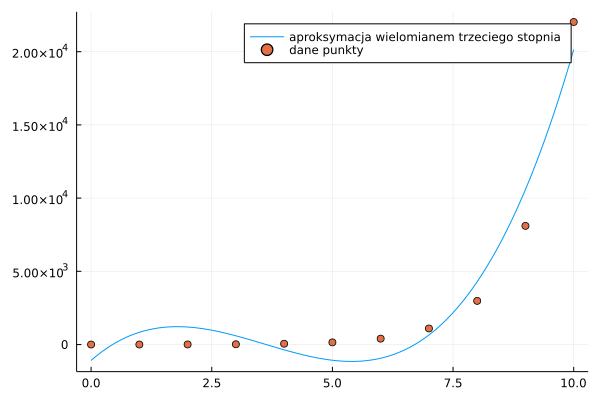

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for xkbcommon_jll [d8fb68d0-12a3-5cfd-a85a-d49703b185fd]
│   exception = Required dependency Xorg_xkbcomp_jll [35661453-b289-5fab-8a00-3d9160c6a3a4] failed to load from a cache file.
└ @ Base loading.jl:1132
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Qt5Base_jll [ea2cea3b-5b76-57ae-a6ef-0a8af62496e1]
│   exception = Required dependency Xorg_xkbcomp_jll [35661453-b289-5fab-8a00-3d9160c6a3a4] failed to load from a cache file.
└ @ Base loading.jl:1132
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for xkbcommon_jll [d8fb68d0-12a3-5cfd-a85a-d49703b185fd]
│   exception = Required dependency Xorg_xkbcomp_jll [35661453-b289-5fab-8a00-3d9160c6a3a4] failed to load from a cache file.
└ @ Base loading.jl:1132
┌ Warning: The call to compilec

In [19]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [20]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

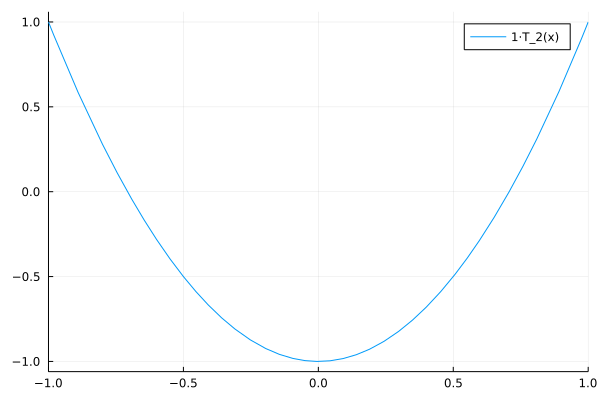

In [21]:
plot(t2)

In [22]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865476

In [23]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1 + 2*x^2)

In [24]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [25]:
convert(Polynomial, kombinacja_T)

Polynomial(2 + 2*x + 2*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [26]:
# using Pkg;
# Pkg.add("TaylorSeries")

In [27]:
using TaylorSeries

In [28]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [29]:
# Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [30]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [31]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [32]:
# Z przybliżenia Taylora tworzymy wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

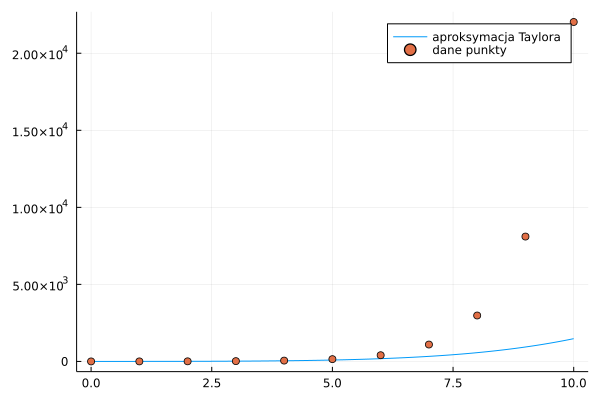

In [33]:
plot(myfun_t_pol,  extrema(xs)..., label="aproksymacja Taylora")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Rozwinięcie Taylora w innym punkcie

In [34]:
x0 = 7

7

In [35]:
# Rozwinięcie Taylora 
myfun_taylor_x0 = myfun(t+x0)

 1096.6331584284585 + 1096.6331584284585 t + 548.3165792142293 t² + 182.77219307140976 t³ + 45.69304826785244 t⁴ + 9.138609653570487 t⁵ + 𝒪(t⁶)

In [36]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol_x0 = Polynomial(myfun_taylor_x0.coeffs)

Polynomial(1096.6331584284585 + 1096.6331584284585*x + 548.3165792142293*x^2 + 182.77219307140976*x^3 + 45.69304826785244*x^4 + 9.138609653570487*x^5)

Narysujmy to co dostaniemy.

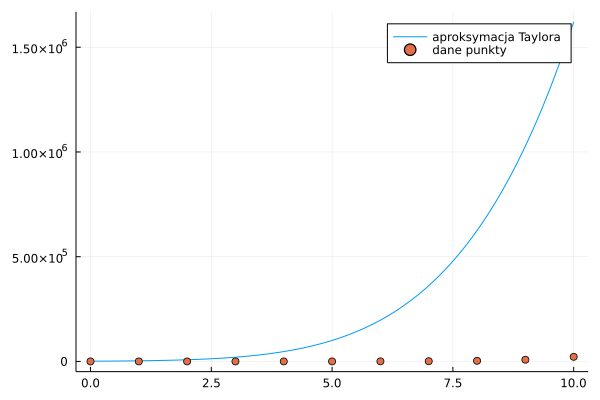

In [37]:
plot(myfun_t_pol_x0,  extrema(xs)..., label="aproksymacja Taylora")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

Widać, że coś jest źle - spodziwamy się małego błędu przy punkcie `x0=7` a jest większy niż poprzednio.

Po przesunięciu o x0, należy "przesunąć" oś X. Wartość 0, to teraz x0, 1 to x0+1 etc.

In [38]:
myfun_t_pol_x0_shifted(x) = myfun_t_pol_x0(x.-x0)

myfun_t_pol_x0_shifted (generic function with 1 method)

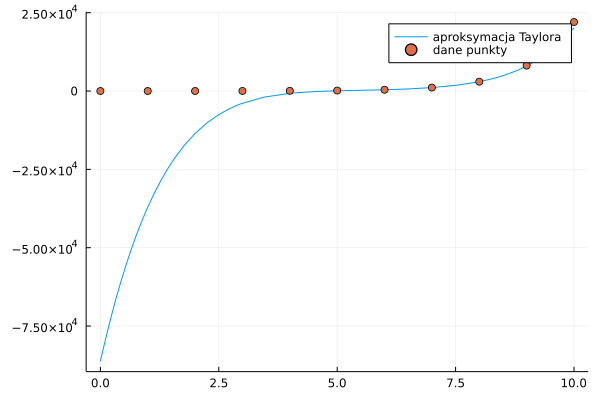

In [39]:
plot(myfun_t_pol_x0_shifted,  extrema(xs)..., label="aproksymacja Taylora")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Aproksymacja Padego

In [40]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 


3. Użyć funkcji `polyfit` z pakietu  Polynomials do znalezienia odpowiednich wielomianów, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)**

4. Pokazać zniwelowanie efektu Rungego (przy interpolacji) poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Narysować wybraną funkcję z zaznaczonymi węzłami i wielomianem interpolacyjnym dla węzłów równoodległych oraz Czebyszewa (2 wykresy).**(1 pkt)**

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**
